# Exploratory research
## By Juan Manuel Franco Islas

In this notebook I am going to do a exploratory research over the data to understand the data and display it in a grafic way.

## Import libraries

In [200]:
import pandas as pd
import re
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
%matplotlib inline

## Loading the dataset

In [2]:
df_main = pd.read_csv('../../reed_uk.csv')

In [3]:
df_main.head(5)

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
0,catering jobs,Chudleigh,Haulfryn Group,uk,reed,Apply now New opportunity not to be missed! H...,NaN,Commis Chef,"Permanent, full-time",3/12/2018,"£18,323 per annum",Devon
1,law jobs,Swindon,Reed,uk,reed,Apply now This role requires an experienced s...,NaN,Corporate Legal Secretary,"Permanent, full-time",3/8/2018,"£18,000 - £22,000 per annum",Wiltshire
2,factory jobs,Norfolk,Swanstaff Recruitment Ltd,uk,reed,Apply now Job Title: Warehouse personLocation...,NaN,Warehouse Person,"Permanent, full-time",2/27/2018,Salary not specified,East Anglia
3,law jobs,Hurstpierpoint,Castles Solicitors,uk,reed,Apply now Castles Solicitors are looking for ...,Required skills Admin Case Management Corresp...,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time",2/21/2018,"£15,000 - £17,000 per annum, pro-rata",West Sussex
4,factory jobs,Hertfordshire,Marketplace Group,uk,reed,Apply now International Pharmaceutical Manufa...,NaN,Category Planner - Pharmaceutical,"Permanent, full-time",3/1/2018,"£37,000 - £45,000 per annum",South East England


## Undersanting the dataset

Dataset shape

In [6]:
print(f'The number of rows is: {df_main.shape[0]}')
print(" ")
print(f'The number of columns is: {df_main.shape[1]}')

The number of rows is: 50000
 
The number of columns is: 12


Applying some useful funciones.

In [7]:
df_main.describe(include='all')

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
count,50000,50000,50000,50000,50000,50000,20548,50000,50000,50000,50000,49980
unique,37,2918,5166,1,1,42057,14887,29155,9,66,7345,167
top,health jobs,London,Hays Specialist Recruitment Limited,uk,reed,Apply on employer's website Add an annual tur...,Required skills Recruitment,Administrator,"Permanent, full-time",3/7/2018,Salary negotiable,London
freq,1930,4349,1830,50000,50000,85,123,162,36864,8472,4539,5900


In [8]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category          50000 non-null  object
 1   city              50000 non-null  object
 2   company_name      50000 non-null  object
 3   geo               50000 non-null  object
 4   job_board         50000 non-null  object
 5   job_description   50000 non-null  object
 6   job_requirements  20548 non-null  object
 7   job_title         50000 non-null  object
 8   job_type          50000 non-null  object
 9   post_date         50000 non-null  object
 10  salary_offered    50000 non-null  object
 11  state             49980 non-null  object
dtypes: object(12)
memory usage: 4.6+ MB


In [9]:
df_main.nunique()

category               37
city                 2918
company_name         5166
geo                     1
job_board               1
job_description     42057
job_requirements    14887
job_title           29155
job_type                9
post_date              66
salary_offered       7345
state                 167
dtype: int64

In [10]:
df_main.isnull().sum()

category                0
city                    0
company_name            0
geo                     0
job_board               0
job_description         0
job_requirements    29452
job_title               0
job_type                0
post_date               0
salary_offered          0
state                  20
dtype: int64

With this first and fast exploratory research, I have some information about the dataset. 
1. There are two useless columns geo and job_board because all the values in these columns are the same in all the dataset.
2. There are two columns with null data state with 20 null values and job_requirements with 29452 null values.
3. All the columns are categorical. Only salary_offered will be numerical with some preprocessing.

Now I have some questions about the dataset and other ones that can be answered by the dataset.  I am going to establish all of them and answer them.

## 1. Which are the cities with more popularity in the dataset?

In [33]:
df_cities = df_main.copy()

I am only work with some columns

In [94]:
def drop_useless_columns(df, drop_list):
    for column in drop_list:
        df.drop([column], axis=1, inplace=True)

In [35]:
drop_list_cities = ['geo', 'job_board', 'post_date', 'job_requirements', 'job_description']

In [36]:
drop_useless_columns(df_cities, drop_list_cities)

In [37]:
df_cities.head(5)

,category,city,company_name,job_title,job_type,salary_offered,state
0,catering jobs,Chudleigh,Haulfryn Group,Commis Chef,"Permanent, full-time","£18,323 per annum",Devon
1,law jobs,Swindon,Reed,Corporate Legal Secretary,"Permanent, full-time","£18,000 - £22,000 per annum",Wiltshire
2,factory jobs,Norfolk,Swanstaff Recruitment Ltd,Warehouse Person,"Permanent, full-time",Salary not specified,East Anglia
3,law jobs,Hurstpierpoint,Castles Solicitors,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time","£15,000 - £17,000 per annum, pro-rata",West Sussex
4,factory jobs,Hertfordshire,Marketplace Group,Category Planner - Pharmaceutical,"Permanent, full-time","£37,000 - £45,000 per annum",South East England


In [38]:
df_cities["city"].unique()

array(['Chudleigh', 'Swindon', 'Norfolk', ..., 'Melbourn', 'Somercotes',
       'Astmoor Industrial Estate'], dtype=object)

In [39]:
df_cities_2 = df_cities.groupby(['city']).count()

In [40]:
df_cities_2 = df_cities_2.sort_values(by=['category'], ascending=False)

In [41]:
df_cities_2.head(10)

,category,company_name,job_title,job_type,salary_offered,state
city,,,,,,
London,4349,4349,4349,4349,4349,4349
Manchester,1283,1283,1283,1283,1283,1283
Central London,997,997,997,997,997,997
City of London,943,943,943,943,943,943
Birmingham,931,931,931,931,931,931
Bristol,881,881,881,881,881,881
Leeds,877,877,877,877,877,877
City Of London,687,687,687,687,687,687
West London,636,636,636,636,636,636


As we can see the most popular city in the UK is London but we also see that London is writing in different ways, for that reason I am going to apply some preprocessing over the city column.

### Preprocessing over city column

In [69]:
df_cities_3 = df_cities.copy()

In [70]:
df_cities_3['city'] = df_cities_3['city'].replace(to_replace=r'([a-zA-Z]*\s)*London', value='London', regex=True)

In [71]:
df_cities_3 = df_cities_3 .groupby(['city']).count()

In [72]:
df_cities_3 = df_cities_3.sort_values(by=['category'], ascending=False)

In [73]:
df_cities_3.head(10)

,category,company_name,job_title,job_type,salary_offered,state
city,,,,,,
London,9467,9467,9467,9467,9467,9467
Manchester,1283,1283,1283,1283,1283,1283
Birmingham,931,931,931,931,931,931
Bristol,881,881,881,881,881,881
Leeds,877,877,877,877,877,877
Reading,483,483,483,483,483,483
Glasgow,478,478,478,478,478,478
Milton Keynes,445,445,445,445,445,445
Cambridge,422,422,422,422,422,422


Now, I am going to work only with the five most popular cities

In [127]:
df_cities_4 = df_cities_3.head(5)

### Displaying the information in a grafic way.

In [128]:
df_cities_4

,category,company_name,job_title,job_type,salary_offered,state
city,,,,,,
London,9467,9467,9467,9467,9467,9467
Manchester,1283,1283,1283,1283,1283,1283
Birmingham,931,931,931,931,931,931
Bristol,881,881,881,881,881,881
Leeds,877,877,877,877,877,877


In [129]:
popularity_scores = df_cities_4['category']
labels = popularity_scores.index
normdata = colors.Normalize(min(popularity_scores), max(popularity_scores))
colormap = cm.get_cmap("Blues")
colores = colormap(normdata(popularity_scores))

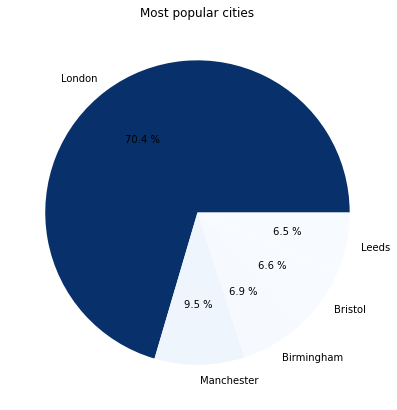

In [130]:
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(popularity_scores, labels=labels, autopct= "%0.1f %%", colors=colores)
ax1.set_title("Most popular cities")
plt.show()

In [131]:
df_cities_4 = df_cities_3.head(2)
popularity_scores = df_cities_4['category']
other_cities = abs(sum(popularity_scores) - 50000)
popularity_scores = popularity_scores.append(pd.Series(other_cities, index=['Other cities']))
labels = popularity_scores.index
normdata = colors.Normalize(min(popularity_scores), max(popularity_scores))
colormap = cm.get_cmap("Blues")
colores = colormap(normdata(popularity_scores))

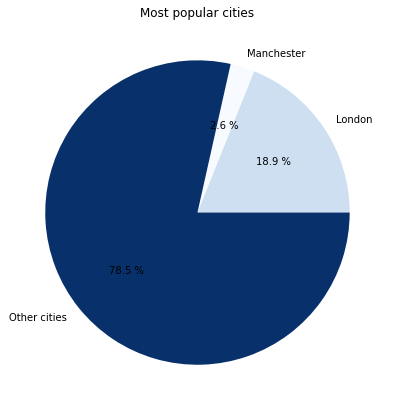

In [132]:
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(popularity_scores, labels=labels, autopct= "%0.1f %%", colors=colores)
ax1.set_title("Most popular cities")
plt.show()

As a conclusion in the first graphic, we can see that London City is the most popular city in the  UK but in the second graphic, we can see that the work opportunities in the UK have a relatively good distribution over all the cities in the UK.

## 2. Which cities have a higher salary?

To aswer this question I have to do a Preprocessing over salary_offered column

I am going to do four different preprocessing over the following cases:
1. Salary range per annum "£18,000 - £22,000 per annum"
2. Salary per annum "£18,323 per annum" 
3. Salary range per hour "£8.00 - £8.50 per hour"
4. Salary per hour "£7.50 per hour"
All these cases going to be a Salary mean per annum, the other cases like "negotiable", "Competitive salary", etc going to be setting as null values.

In [4]:
df_cities_5 = df_main.copy()

In [5]:
df_cities_5['salary_offered'].unique()

array([' £18,323 per annum ', ' £18,000 - £22,000 per annum ',
       ' Salary not specified ', ..., ' £43,609 per annum ',
       ' £31,592 - £44,430 per annum ',
       ' £27,500 - £30,000 per annum, negotiable, OTE '], dtype=object)

In [6]:
df_cities_5['salary_offered'].isnull().sum()

0

In [7]:
df_cities_5['salary_offered'].head(30)

0                                   £18,323 per annum 
1                         £18,000 - £22,000 per annum 
2                                Salary not specified 
3               £15,000 - £17,000 per annum, pro-rata 
4                         £37,000 - £45,000 per annum 
5                      £9,100 - £9,152 per annum, OTE 
6                             £9.25 - £10.15 per hour 
7                         £35,000 - £40,000 per annum 
8                         £23,000 - £26,600 per annum 
9           £18,000 - £25,000 per annum, inc benefits 
10                   £12,000 - £40,000 per annum, OTE 
11                        £30,000 - £40,000 per annum 
12                                 Competitive salary 
13                                 Competitive salary 
14                                  £44,000 per annum 
15                             £8.00 - £8.50 per hour 
16                   £25,000 - £30,000 per annum, OTE 
17                                     £7.50 per hour 
18        

In [8]:
s = df_cities_5['salary_offered']
print(type(s))

<class 'pandas.core.series.Series'>


### 1 Salaries with range and per annum 

In [9]:
list_with_range_sannum = s.str.extract(r'£([0-9]+,[0-9]+)\s-\s£([0-9]+,[0-9]+)\s\w+\sannum')

In [10]:
list_with_range_sannum.head(10)

,0,1
0,NaN,NaN
1,"18,000","22,000"
2,NaN,NaN
3,"15,000","17,000"
4,"37,000","45,000"
5,"9,100","9,152"
6,NaN,NaN
7,"35,000","40,000"
8,"23,000","26,600"
9,"18,000","25,000"


In [11]:
list_with_range_sannum[0] = list_with_range_sannum[0].str.replace(',', '')

In [12]:
list_with_range_sannum[1] = list_with_range_sannum[1].str.replace(',', '')

In [13]:
list_with_range_sannum.head(10)

,0,1
0,NaN,NaN
1,18000,22000
2,NaN,NaN
3,15000,17000
4,37000,45000
5,9100,9152
6,NaN,NaN
7,35000,40000
8,23000,26600
9,18000,25000


In [14]:
list_with_range_sannum.isnull().sum()

0    24674
1    24674
dtype: int64

In [15]:
def mean(row):
    """"this funcion resive a df and return the mean over the values in the column 1 and column 2 by each row"""
    return (int(row[0]) + int(row[1]))//2

In [28]:
list_with_range_sannum = list_with_range_sannum.apply(lambda x: mean(x) if(np.all(pd.notnull(x[1]))) else x, axis = 1)

In [29]:
list_with_range_sannum.head(10)

,0,1
0,NaN,NaN
1,20000.0,20000.0
2,NaN,NaN
3,16000.0,16000.0
4,41000.0,41000.0
5,9126.0,9126.0
6,NaN,NaN
7,37500.0,37500.0
8,24800.0,24800.0
9,21500.0,21500.0


### 2 Salaries per annum

In [17]:
list_with_sannum = s.str.extract(r'£([0-9]+,[0-9]+)\s\w+\sannum')

In [18]:
list_with_sannum.head(15)

,0
0,"18,323"
1,"22,000"
2,NaN
3,"17,000"
4,"45,000"
5,"9,152"
6,NaN
7,"40,000"
8,"26,600"
9,"25,000"


In [19]:
list_with_sannum[0] = list_with_sannum[0].str.replace(',', '')

In [20]:
list_with_sannum.isnull().sum()

0    19625
dtype: int64

In [21]:
list_with_sannum.head(15)

,0
0,18323
1,22000
2,NaN
3,17000
4,45000
5,9152
6,NaN
7,40000
8,26600
9,25000


### 3 Salaries with range per hour

In [39]:
list_with_hour = s.str.extract(r'£([0-9]+\.[0-9]+)\s-\s£([0-9]+\.[0-9]+)\s\w+\shour')

In [49]:
list_with_hour.head(10)

,0,1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,9.25,10.15
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [43]:
def mean2(row):
     """"this funcion resive a df and return the mean over the values in the column 1 and column 2 by each row, also convert 
         salary per hour to salary per annum, using 40 hours per week and 54 laborable weeks per year"""
    aux = (float(row[0]) + float(row[1]))/2
    aux2 = aux*2080
    return aux2

In [44]:
list_with_range_hour = list_with_hour.apply(lambda x: mean2(x) if(np.all(pd.notnull(x[1]))) else x, axis = 1)

In [45]:
list_with_range_hour.head(10)

,0,1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,20176.0,20176.0
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


### 4 Salaries per hour

In [46]:
list_with_hour_2 = s.str.extract(r'£([0-9]+\.[0-9]+)\s\w+\shour')

In [50]:
list_with_hour_2.head(20)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,10.15
7,NaN
8,NaN
9,NaN


In [59]:
def to_sannum(row):
    """"this funcion resive a df and return the convertion salary per hour to salary per annum, 
        using 40 hours per week and 54 laborable weeks per year"""
    aux = float(row[0])*2080
    return aux

In [61]:
list_with_hour_2 = list_with_hour_2.apply(lambda x: to_sannum(x) if(np.all(pd.notnull(x[0]))) else x, axis = 1)

In [84]:
list_with_hour_2.head(20)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,21112.0
7,NaN
8,NaN
9,NaN


### Mixing all salaries

In [68]:
salary = list_with_range_sannum[0]

In [53]:
salary.head(5)

0        NaN
1    20000.0
2        NaN
3    16000.0
4    41000.0
Name: 0, dtype: float64

In [54]:
print(type(salary))

<class 'pandas.core.series.Series'>


In [69]:
salary = pd.DataFrame(data=salary)

In [57]:
salary.head(5)

,0
0,NaN
1,20000.0
2,NaN
3,16000.0
4,41000.0


In [58]:
print(type(salary))

<class 'pandas.core.frame.DataFrame'>


In [70]:
salary[1]= list_with_sannum[0]

In [75]:
salary.head(10)

,0,1
0,NaN,18323
1,20000.0,22000
2,NaN,NaN
3,16000.0,17000
4,41000.0,45000
5,9126.0,9152
6,NaN,NaN
7,37500.0,40000
8,24800.0,26600
9,21500.0,25000


In [72]:
salary2 = salary.apply(lambda x: x[1] if(np.all(pd.isnull(x[0]))) else x[0], axis = 1)

In [74]:
salary2.head(10)

0    18323
1    20000
2      NaN
3    16000
4    41000
5     9126
6      NaN
7    37500
8    24800
9    21500
dtype: object

In [76]:
salary2 = pd.DataFrame(data=salary2)

In [77]:
salary2.head(5)

,0
0,18323
1,20000
2,NaN
3,16000
4,41000


In [78]:
salary2[1]= list_with_range_hour[0]

In [80]:
salary2.head(10)

,0,1
0,18323,NaN
1,20000,NaN
2,NaN,NaN
3,16000,NaN
4,41000,NaN
5,9126,NaN
6,NaN,20176.0
7,37500,NaN
8,24800,NaN
9,21500,NaN


In [81]:
salary3 = salary2.apply(lambda x: x[1] if(np.all(pd.isnull(x[0]))) else x[0], axis = 1)

In [83]:
salary3 = pd.DataFrame(data=salary3)
salary3.head(20)

,0
0,18323
1,20000
2,NaN
3,16000
4,41000
5,9126
6,20176
7,37500
8,24800
9,21500


In [85]:
salary3[1]= list_with_hour_2[0]

In [86]:
salary3.head(20)

,0,1
0,18323,NaN
1,20000,NaN
2,NaN,NaN
3,16000,NaN
4,41000,NaN
5,9126,NaN
6,20176,21112.0
7,37500,NaN
8,24800,NaN
9,21500,NaN


In [87]:
salary4 = salary3.apply(lambda x: x[1] if(np.all(pd.isnull(x[0]))) else x[0], axis = 1)
salary4 = pd.DataFrame(data=salary4)
salary4.head(20)

,0
0,18323
1,20000
2,NaN
3,16000
4,41000
5,9126
6,20176
7,37500
8,24800
9,21500


In [88]:
salary4.isnull().sum()

0    11017
dtype: int64

In [89]:
salary4.notnull().sum()

0    38983
dtype: int64

### New Main Data Frame

Now I am going to create a new main data frame with all preprocessing applied.

In [90]:
df_main2 = df_main.copy()

In [91]:
df_main2['city'] = df_main2['city'].replace(to_replace=r'([a-zA-Z]*\s)*London', value='London', regex=True)

In [92]:
df_main2['salary'] = salary4[0]

In [95]:
drop_list = ['geo', 'job_board', 'salary_offered']
drop_useless_columns(df_main2, drop_list)

In [125]:
df_main2 = df_main2.astype({'salary':'float64'})

In [127]:
df_main2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   category          50000 non-null  object 
 1   city              50000 non-null  object 
 2   company_name      50000 non-null  object 
 3   job_description   50000 non-null  object 
 4   job_requirements  20548 non-null  object 
 5   job_title         50000 non-null  object 
 6   job_type          50000 non-null  object 
 7   post_date         50000 non-null  object 
 8   state             49980 non-null  object 
 9   salary            38983 non-null  float64
dtypes: float64(1), object(9)
memory usage: 3.8+ MB


In [126]:
df_main2.head(5)

,category,city,company_name,job_description,job_requirements,job_title,job_type,post_date,state,salary
0,catering jobs,Chudleigh,Haulfryn Group,Apply now New opportunity not to be missed! H...,NaN,Commis Chef,"Permanent, full-time",3/12/2018,Devon,18323.0
1,law jobs,Swindon,Reed,Apply now This role requires an experienced s...,NaN,Corporate Legal Secretary,"Permanent, full-time",3/8/2018,Wiltshire,20000.0
2,factory jobs,Norfolk,Swanstaff Recruitment Ltd,Apply now Job Title: Warehouse personLocation...,NaN,Warehouse Person,"Permanent, full-time",2/27/2018,East Anglia,NaN
3,law jobs,Hurstpierpoint,Castles Solicitors,Apply now Castles Solicitors are looking for ...,Required skills Admin Case Management Corresp...,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time",2/21/2018,West Sussex,16000.0
4,factory jobs,Hertfordshire,Marketplace Group,Apply now International Pharmaceutical Manufa...,NaN,Category Planner - Pharmaceutical,"Permanent, full-time",3/1/2018,South East England,41000.0


### Saving the new data frame 

In [202]:
df_main2.to_csv(index=False, path_or_buf= '../../reed_uk_2.csv')

### Answering the question
Which cities have a higher salary?

In [97]:
df_cities_6 = df_main2.copy()

In [98]:
drop_list_cities_2 = ['company_name', 'category', 'job_description', 'job_requirements', 'job_title', 'job_type', 'post_date', 'state']
drop_useless_columns(df_cities_6, drop_list_cities_2)

In [99]:
df_cities_6.head(5)

,city,salary
0,Chudleigh,18323
1,Swindon,20000
2,Norfolk,NaN
3,Hurstpierpoint,16000
4,Hertfordshire,41000


In [102]:
df_cities_6.notnull().sum()

city      50000
salary    38983
dtype: int64

In [103]:
df_cities_6.dropna(subset=['salary'], inplace=True)

In [104]:
df_cities_6.notnull().sum()

city      38983
salary    38983
dtype: int64

In [114]:
df_cities_7 = df_cities_6.groupby(['city']).median(numeric_only=True)
df_cities_7 = df_cities_7.sort_values(by=['salary'], ascending=False)
df_cities_7.head(10)

,salary
city,
Walton On The Naze,538500.0
New Shoreham,426400.0
Pitsea,416820.0
Los Angeles,175000.0
Austin -Texas,175000.0
New York,175000.0
Sydney,175000.0
Cayman Islands,160000.0
Okehampton,149750.0


In this table we can see the cities order by the best salary offerd

## 3. Which are the states with more popularity in the dataset?

In [144]:
df_states = df_main2.copy()

In [151]:
df_states['state'].isnull().sum()

20

In [152]:
df_states.dropna(subset=['state'], inplace=True)

In [153]:
df_states['state'].isnull().sum()

0

In [154]:
df_states.head(5)

,category,city,company_name,job_title,job_type,salary_offered,state
0,catering jobs,Chudleigh,Haulfryn Group,Commis Chef,"Permanent, full-time","£18,323 per annum",Devon
1,law jobs,Swindon,Reed,Corporate Legal Secretary,"Permanent, full-time","£18,000 - £22,000 per annum",Wiltshire
2,factory jobs,Norfolk,Swanstaff Recruitment Ltd,Warehouse Person,"Permanent, full-time",Salary not specified,East Anglia
3,law jobs,Hurstpierpoint,Castles Solicitors,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time","£15,000 - £17,000 per annum, pro-rata",West Sussex
4,factory jobs,Hertfordshire,Marketplace Group,Category Planner - Pharmaceutical,"Permanent, full-time","£37,000 - £45,000 per annum",South East England


In [155]:
print(f'The number of rows is: {df_states.shape[0]}')
print(" ")
print(f'The number of columns is: {df_states.shape[1]}')

The number of rows is: 49980
 
The number of columns is: 7


In [156]:
df_states_2 = df_states.groupby(['state']).count()

In [157]:
df_states_2 = df_states_2.sort_values(by=['category'], ascending=False)

In [159]:
df_states_2.head(10)

,category,city,company_name,job_title,job_type,salary_offered
state,,,,,,
London,5900,5900,5900,5900,5900,5900
South East England,5667,5667,5667,5667,5667,5667
Lancashire,2375,2375,2375,2375,2375,2375
West Midlands,1934,1934,1934,1934,1934,1934
Surrey,1915,1915,1915,1915,1915,1915
West Yorkshire,1616,1616,1616,1616,1616,1616
Hampshire,1450,1450,1450,1450,1450,1450
Berkshire,1373,1373,1373,1373,1373,1373
Essex,1281,1281,1281,1281,1281,1281


### Displaying the information in a grafic way.

In [161]:
df_states_3 = df_states_2.head(5)

In [162]:
popularity_scores = df_states_3['category']
labels = popularity_scores.index
normdata = colors.Normalize(min(popularity_scores), max(popularity_scores))
colormap = cm.get_cmap("Oranges")
colores = colormap(normdata(popularity_scores))

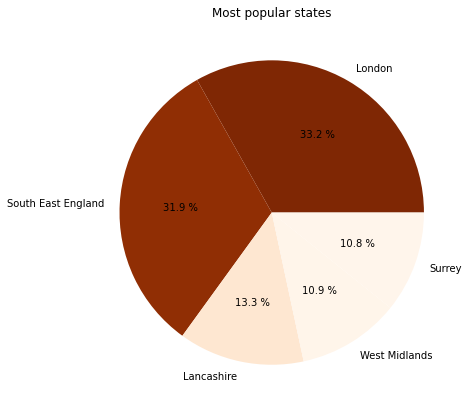

In [164]:
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(popularity_scores, labels=labels, autopct= "%0.1f %%", colors=colores)
ax1.set_title("Most popular states")
plt.show()

In this case we can see that there are two more popular areas

## 4. Which companies have more job offers?

In [115]:
df_companies = df_main2.copy()

In [116]:
df_companies = df_companies.groupby(['company_name']).count()
df_companies = df_companies.sort_values(by=['category'], ascending=False)
df_companies.head(10)

,category,city,job_description,job_requirements,job_title,job_type,post_date,state,salary
company_name,,,,,,,,,
Hays Specialist Recruitment Limited,1830,1830,1830,398,1830,1830,1830,1830,1561
Reed,804,804,804,3,804,804,804,804,750
Search Consultancy,534,534,534,148,534,534,534,534,172
Pareto,450,450,450,0,450,450,450,450,450
Adecco UK Limited,355,355,355,131,355,355,355,355,322
SW6 Associates Ltd,302,302,302,199,302,302,302,302,302
"Randstad Construction, Property and Engineering",287,287,287,110,287,287,287,287,251
Rise Technical Recruitment Limited,280,280,280,275,280,280,280,280,280
Interaction Recruitment,267,267,267,0,267,267,267,267,222


### Displaying the information in a grafic way.

In [117]:
df_companies_2 = df_companies.head(5)

In [120]:
popularity_scores = df_companies_2['category']
labels = popularity_scores.index
normdata = colors.Normalize(min(popularity_scores), max(popularity_scores))
colormap = cm.get_cmap("Greens")
colores = colormap(normdata(popularity_scores))

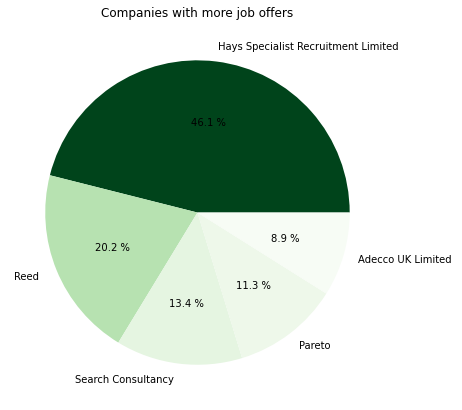

In [121]:
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(popularity_scores, labels=labels, autopct= "%0.1f %%", colors=colores)
ax1.set_title("Companies with more job offers")
plt.show()

## 5. Which job titles have the best salary offer?

In [131]:
df_job_titles = df_main2.copy()

In [133]:
drop_list_job_titles = ['company_name', 'category', 'job_description', 'job_requirements', 'city', 'job_type', 'post_date', 'state']
drop_useless_columns(df_job_titles, drop_list_job_titles)

In [134]:
df_job_titles = df_job_titles.groupby(['job_title']).median(numeric_only=True)
df_job_titles = df_job_titles.sort_values(by=['salary'], ascending=False)
df_job_titles.head(10)

,salary
job_title,
SENIOR FINANCE MANAGER,988000.0
London Smoking Cessation Programme Manager,745680.0
Chief Accountant,728000.0
Software Engineer C++ - Contract,696800.0
Commercial Contracts Lawyer,676000.0
Senior Digital Marketing Executive - London EC2,624000.0
Regional Manager - Funeral Care,606000.0
Product Design Manager,600000.0
Control and Systems Engineer,552000.0


## 6. Which job types have the best salary offer?

In [135]:
df_job_types = df_main2.copy()

In [136]:
drop_list_job_types = ['company_name', 'category', 'job_description', 'job_requirements', 'city', 'job_title', 'post_date', 'state']
drop_useless_columns(df_job_types, drop_list_job_types)

In [137]:
df_job_types = df_job_types.groupby(['job_type']).median(numeric_only=True)
df_job_types = df_job_types.sort_values(by=['salary'], ascending=False)
df_job_types.head(10)

,salary
job_type,
"Permanent, full-time",28500.0
"Contract, full-time",28000.0
"Contract, full-time or part-time",23400.0
"Permanent, full-time or part-time",22500.0
"Temporary, full-time",20889.7
"Temporary, full-time or part-time",20800.0
"Temporary, part-time",18720.0
"Contract, part-time",17733.5
"Permanent, part-time",17717.0


## 7. Which are the most popular categories?

In [138]:
df_categories = df_main2.copy()

In [139]:
df_categories = df_categories.groupby(['category']).count()
df_categories = df_categories.sort_values(by=['job_title'], ascending=False)
df_categories.head(10)

,city,company_name,job_description,job_requirements,job_title,job_type,post_date,state,salary
category,,,,,,,,,
health jobs,1930,1930,1930,481,1930,1930,1930,1930,1601
education jobs,1898,1898,1898,813,1898,1898,1898,1898,870
it jobs,1890,1890,1890,879,1890,1890,1890,1889,1374
logistics jobs,1885,1885,1885,733,1885,1885,1885,1885,1502
construction property jobs,1859,1859,1859,696,1859,1859,1859,1859,1490
engineering jobs,1858,1858,1858,964,1858,1858,1858,1858,1499
accountancy jobs,1856,1856,1856,576,1856,1856,1856,1855,1632
sales jobs,1855,1855,1855,940,1855,1855,1855,1854,1559
accountancy qualified jobs,1836,1836,1836,579,1836,1836,1836,1832,1448


## 8. Which is the median salary in all  categories?

In [140]:
df_categories_2 = df_main2.copy()

In [141]:
drop_list_categories_2 = ['company_name', 'job_type', 'job_description', 'job_requirements', 'city', 'job_title', 'post_date', 'state']
drop_useless_columns(df_categories_2, drop_list_categories_2)

In [144]:
df_categories_2 = df_categories_2.groupby(['category']).median(numeric_only=True)
df_categories_2 = df_categories_2.sort_values(by=['salary'], ascending=False)
df_categories_2

,salary
category,
accountancy qualified jobs,45000.0
strategy consultancy jobs,40000.0
banking jobs,40000.0
it jobs,39500.0
construction property jobs,33280.0
energy jobs,33000.0
purchasing jobs,32500.0
law jobs,32500.0
finance jobs,32500.0


## 9. There are some dates with more offers posted or there is a tendency?

To answer this question I am going to split the dataset into three datasets based on the period of time.

In [145]:
df_date = df_main2.copy()

In [146]:
df_date['post_date'] = pd.to_datetime(df_date['post_date'], infer_datetime_format=True)

In [147]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   category          50000 non-null  object        
 1   city              50000 non-null  object        
 2   company_name      50000 non-null  object        
 3   job_description   50000 non-null  object        
 4   job_requirements  20548 non-null  object        
 5   job_title         50000 non-null  object        
 6   job_type          50000 non-null  object        
 7   post_date         50000 non-null  datetime64[ns]
 8   state             49980 non-null  object        
 9   salary            38983 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 3.8+ MB


In [148]:
df_date_2 = df_date.groupby(['post_date']).count()

In [149]:
df_date_2.shape

(66, 9)

In [152]:
df_date_2 = df_date_2.sort_index()

In [153]:
df_date_2.head(10)

,category,city,company_name,job_description,job_requirements,job_title,job_type,state,salary
post_date,,,,,,,,,
2017-08-31,1,1,1,1,1,1,1,1,1
2017-09-21,1,1,1,1,0,1,1,1,1
2017-11-30,1,1,1,1,0,1,1,1,0
2017-12-18,1,1,1,1,0,1,1,1,0
2017-12-21,1,1,1,1,0,1,1,1,1
2017-12-28,1,1,1,1,0,1,1,1,0
2018-01-03,15,15,15,15,0,15,15,15,6
2018-01-04,2,2,2,2,0,2,2,2,2
2018-01-05,3,3,3,3,0,3,3,3,0


In [184]:
def drop(drop_list, df):
    for element in drop_list:
        df.drop(index=element, inplace=True)

In [154]:
df_date_2_1 = df_date_2.head(22)

In [178]:
x = df_date_2_1['category']
labels = df_date_2_1.index

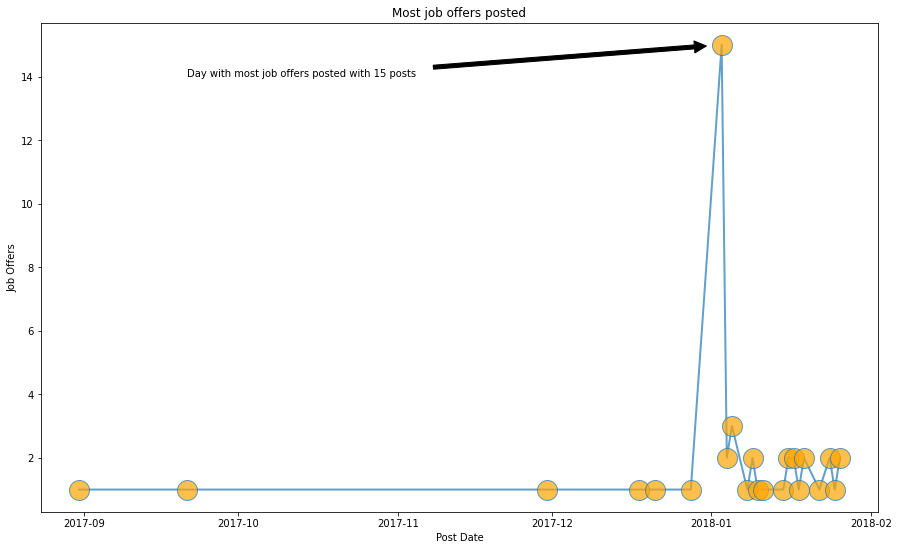

In [180]:
fig, ax = plt.subplots(figsize=(15,9))
rects = ax.plot(labels, x, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
ax.annotate('Day with most job offers posted with 15 posts', xy=('2018-01-03',15), xytext = ('2017-09-21',14),
             arrowprops=dict(facecolor='black', shrink=0.05),)
ax.set_xlabel('Post Date')
ax.set_ylabel('Job Offers')
ax.set_title("Most job offers posted")
plt.show()

In [185]:
drop(labels, df_date_2)

In [187]:
df_date_2_2 = df_date_2.head(22)

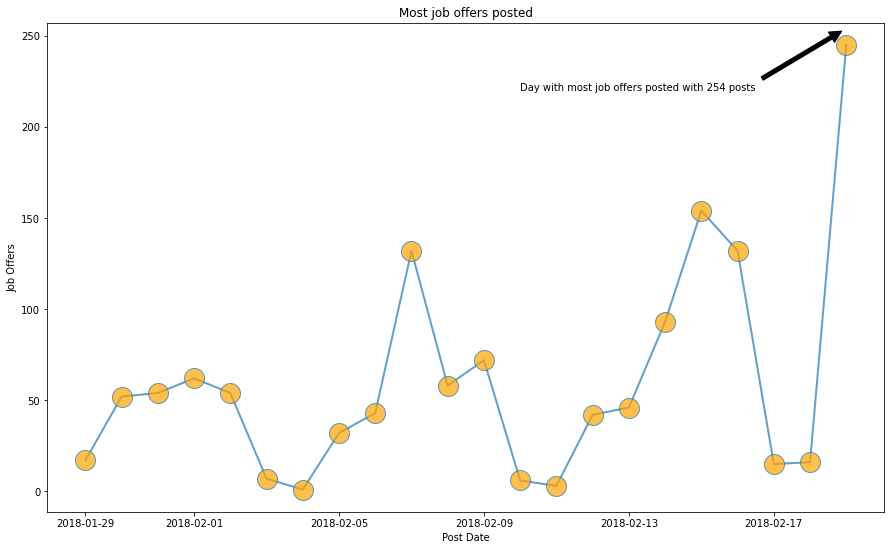

In [192]:
x = df_date_2_2['category']
labels = df_date_2_2.index
fig, ax = plt.subplots(figsize=(15,9))
rects = ax.plot(labels, x, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
ax.annotate('Day with most job offers posted with 254 posts', xy=('2018-02-19',254), xytext = ('2018-02-10',220),
             arrowprops=dict(facecolor='black', shrink=0.05),)
ax.set_xlabel('Post Date')
ax.set_ylabel('Job Offers')
ax.set_title("Most job offers posted")
plt.show()

In [193]:
drop(labels, df_date_2)

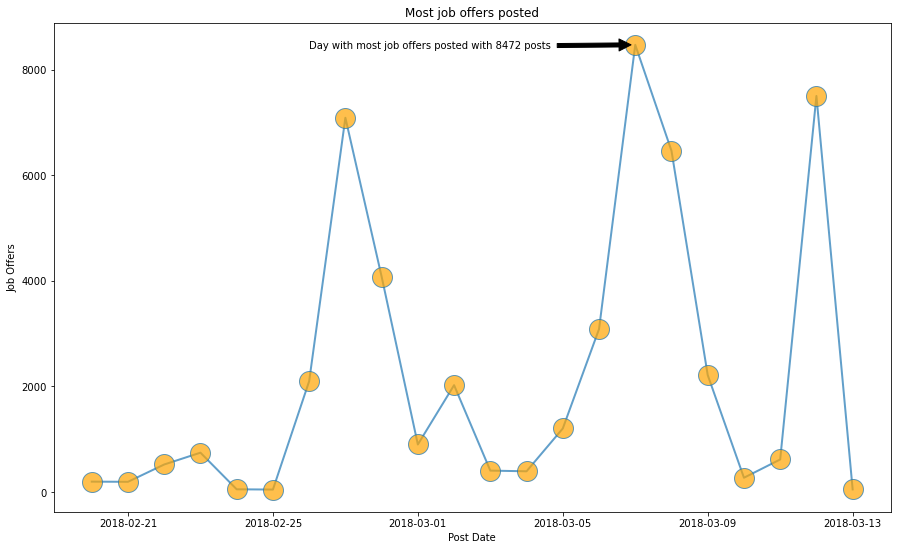

In [201]:
x = df_date_2['category']
labels = df_date_2.index
fig, ax = plt.subplots(figsize=(15,9))
rects = ax.plot(labels, x, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
ax.annotate('Day with most job offers posted with 8472 posts', xy=('2018-03-07',8472), xytext = ('2018-02-26',8400),
             arrowprops=dict(facecolor='black', shrink=0.05),)
ax.set_xlabel('Post Date')
ax.set_ylabel('Job Offers')
ax.set_title("Most job offers posted")
plt.show()

We can see that there is a tendency, day by day the number of job applications is growing, also we can see that there are some specific periods when the number of job applications is bigger.